# Reshaping data, Pivot, Cross Tab
-  wide to long
-  long to wide
-  pivot
-  crosstab

Link
-  https://jovian.com/chetna-shahi31/hr-attrition-analytics

In [1]:
# libraries
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# data
mtcars = data('mtcars')
attr3URL = 'https://raw.githubusercontent.com/dupadhyaya/hrAnalytics/main/data/attrition/HR_attr3.csv'
empdf = pd.read_csv(attr3URL)
mtcars.shape, empdf.shape

((32, 11), (1470, 35))

# try with mtcars

In [53]:
pd.crosstab(mtcars.cyl, mtcars.gear)

gear,3,4,5
cyl,,,
4,1,8,2
6,2,4,1
8,12,0,2


In [54]:
pd.crosstab(mtcars.cyl, mtcars.gear, margins=True)

gear,3,4,5,All
cyl,,,,
4,1,8,2,11
6,2,4,1,7
8,12,0,2,14
All,15,12,5,32


In [56]:
pd.crosstab(mtcars.cyl, mtcars.gear, margins=True, normalize=True)

gear,3,4,5,All
cyl,,,,
4,0.03125,0.250,0.06250,0.34375
6,0.06250,0.125,0.03125,0.21875
8,0.37500,0.000,0.06250,0.43750
All,0.46875,0.375,0.15625,1.00000


In [57]:
pd.crosstab([mtcars.cyl, mtcars.am], [mtcars.gear, mtcars.vs])

gear     3     4     5   
vs       0  1  0  1  0  1
cyl am                   
4   0    0  1  0  2  0  0
    1    0  0  0  6  1  1
6   0    0  2  0  2  0  0
    1    0  0  2  0  1  0
8   0   12  0  0  0  0  0
    1    0  0  0  0  2  0

In [59]:
pd.crosstab([mtcars.cyl, mtcars.am], [mtcars.gear, mtcars.vs], rownames=['Cylinder','Tx Type'], colnames =['Gear','Eng Type'])

Gear               3     4     5   
Eng Type           0  1  0  1  0  1
Cylinder Tx Type                   
4        0         0  1  0  2  0  0
         1         0  0  0  6  1  1
6        0         0  2  0  2  0  0
         1         0  0  2  0  1  0
8        0        12  0  0  0  0  0
         1         0  0  0  0  2  0

# Pivot Table

In [66]:
mtcars.pivot_table('cyl', 'am', columns='gear', aggfunc='count')

gear,3,4,5
am,,,
0,15.0,4.0,NaN
1,NaN,8.0,5.0


In [69]:
mtcars.pivot_table('mpg', 'am', columns='gear', aggfunc=['count','mean'])

count                 mean               
gear     3    4    5          3       4      5
am                                            
0     15.0  4.0  NaN  16.106667  21.050    NaN
1      NaN  8.0  5.0        NaN  26.275  21.38

# Melt
-  create data : empID, Dept, Attendance of various months
-  show data as : empID, Dept, Month, AttendanceCount
-  https://pandas.pydata.org/docs/reference/api/pandas.melt.html

In [73]:
df1 = pd.DataFrame({'empID':[1,2,3,4,5], 
                    'name': [ "Dhiraj", "Kounal", "Akhil", "Pooja","Disha" ], 
                    'dept': ['HR','IT','HR','IT','Fin'],
                    'gender':['M', 'M','M', 'F', 'F'],
                    'jan' : np.random.randint(1,31, size=5),
                    'feb' : np.random.randint(1,28, size=5),
                    'mar' : np.random.randint(1,30, size=5)
                   })
df1

,empID,name,dept,gender,jan,feb,mar
0,1,Dhiraj,HR,M,26,23,18
1,2,Kounal,IT,M,4,11,20
2,3,Akhil,HR,M,6,1,18
3,4,Pooja,IT,F,10,9,9
4,5,Disha,Fin,F,9,3,2


In [75]:
pd.melt(df1, id_vars = ['empID','name','dept','gender'])

,empID,name,dept,gender,variable,value
0,1,Dhiraj,HR,M,jan,26
1,2,Kounal,IT,M,jan,4
2,3,Akhil,HR,M,jan,6
3,4,Pooja,IT,F,jan,10
4,5,Disha,Fin,F,jan,9
5,1,Dhiraj,HR,M,feb,23
6,2,Kounal,IT,M,feb,11
7,3,Akhil,HR,M,feb,1
8,4,Pooja,IT,F,feb,9
9,5,Disha,Fin,F,feb,3


In [77]:
df1M2 = pd.melt(df1, id_vars = ['empID','name','dept','gender'], var_name='month', value_name='attendance')
df1M2

,empID,name,dept,gender,month,attendance
0,1,Dhiraj,HR,M,jan,26
1,2,Kounal,IT,M,jan,4
2,3,Akhil,HR,M,jan,6
3,4,Pooja,IT,F,jan,10
4,5,Disha,Fin,F,jan,9
5,1,Dhiraj,HR,M,feb,23
6,2,Kounal,IT,M,feb,11
7,3,Akhil,HR,M,feb,1
8,4,Pooja,IT,F,feb,9
9,5,Disha,Fin,F,feb,3


In [85]:
df1M2.pivot(columns='month',values='attendance', index=['empID','name','dept','gender'])

,,,month,feb,jan,mar
empID,name,dept,gender,,,
1,Dhiraj,HR,M,23,26,18
2,Kounal,IT,M,11,4,20
3,Akhil,HR,M,1,6,18
4,Pooja,IT,F,9,10,9
5,Disha,Fin,F,3,9,2


# Missing Data
- find, fill, count

In [87]:
df1

,empID,name,dept,gender,jan,feb,mar
0,1,Dhiraj,HR,M,26,23,18
1,2,Kounal,IT,M,4,11,20
2,3,Akhil,HR,M,6,1,18
3,4,Pooja,IT,F,10,9,9
4,5,Disha,Fin,F,9,3,2


In [103]:
df1.loc[[0,2,3],['jan','mar']] = np.nan

In [104]:
df1

,empID,name,dept,gender,jan,feb,mar
0,1,Dhiraj,HR,M,NaN,23,NaN
1,2,Kounal,IT,M,4.0,11,20.0
2,3,Akhil,HR,M,NaN,1,NaN
3,4,Pooja,IT,F,NaN,9,NaN
4,5,Disha,Fin,F,9.0,3,2.0


In [106]:
df1.isna().sum()  #col

empID     0
name      0
dept      0
gender    0
jan       3
feb       0
mar       3
dtype: int64

In [110]:
df1.isnull().sum(axis=1)  #row

0    2
1    0
2    2
3    2
4    0
dtype: int64

In [108]:
df1.fillna('25')

,empID,name,dept,gender,jan,feb,mar
0,1,Dhiraj,HR,M,25,23,25
1,2,Kounal,IT,M,4.0,11,20.0
2,3,Akhil,HR,M,25,1,25
3,4,Pooja,IT,F,25,9,25
4,5,Disha,Fin,F,9.0,3,2.0


# HR data

In [5]:
# now try with employee Data
empdf.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
empdf.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [7]:
#unique values
empdf.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

(array([  0.,  17.,  80., 229., 325., 297., 208., 141., 104.,  64.,   5.,
          0.,   0.]),
 array([10., 15., 20., 25., 30., 35., 40., 45., 50., 55., 60., 65., 70.,
        75.]),
 <BarContainer object of 13 artists>)

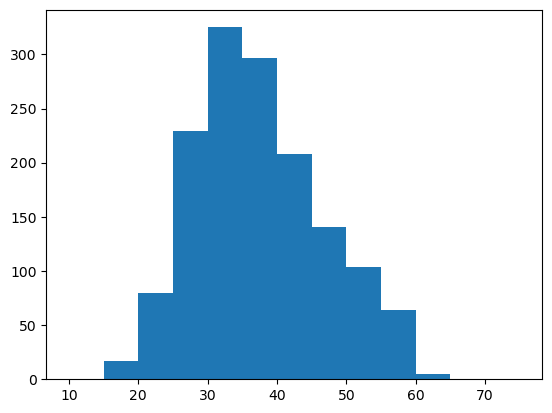

In [11]:
#age distribution of employees
plt.hist(empdf.Age, bins=np.arange(10,80,5))

In [29]:
# fill color by attrition
#empdf.loc[empdf['Attrition']=='Yes','Age']
empdf_attrYes = empdf.loc[empdf['Attrition']=='Yes',['Age']]
empdf_attrNo = empdf.loc[empdf['Attrition']=='No',['Age']]
empdf_attrYes.shape, empdf_attrNo.shape, type(empdf_attrYes)
#empdf_attrYes

((237, 1), (1233, 1), pandas.core.frame.DataFrame)

(array([[ 27.,  29.,  44.,  50.,  24.,  21.,  15.,  11.,   8.,   8.],
        [ 30.,  76., 180., 215., 231., 196., 116.,  81.,  69.,  39.]]),
 array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ]),
 <a list of 2 BarContainer objects>)

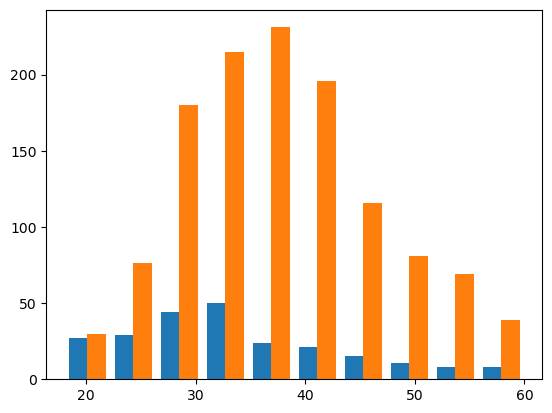

In [30]:
plt.hist([empdf_attrYes.Age, empdf_attrNo.Age])

In [31]:
empdf.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [39]:
selColumns = ['Attrition', 'Age','MonthlyIncome','BusinessTravel','Department','Gender']
print(selColumns)
empdf2 = empdf.loc[:, selColumns]
empdf2.head()

['Attrition', 'Age', 'MonthlyIncome', 'BusinessTravel', 'Department', 'Gender']


,Attrition,Age,MonthlyIncome,BusinessTravel,Department,Gender
0,Yes,41,5993,Travel_Rarely,Sales,Female
1,No,49,5130,Travel_Frequently,Research & Development,Male
2,Yes,37,2090,Travel_Rarely,Research & Development,Male
3,No,33,2909,Travel_Frequently,Research & Development,Female
4,No,27,3468,Travel_Rarely,Research & Development,Male


In [41]:
empdf2.nunique()
#unique values

Attrition            2
Age                 43
MonthlyIncome     1349
BusinessTravel       3
Department           3
Gender               2
dtype: int64

In [49]:
# crosstab
pd.crosstab(index = empdf2['Department'], columns = empdf2['Gender'], margins=True)

Gender,Female,Male,All
Department,,,
Human Resources,20,43,63
Research & Development,379,582,961
Sales,189,257,446
All,588,882,1470


In [50]:
pd.crosstab(index = empdf2['Department'], columns = empdf2['Gender'], margins=True, normalize=True)

Gender,Female,Male,All
Department,,,
Human Resources,0.013605,0.029252,0.042857
Research & Development,0.257823,0.395918,0.653741
Sales,0.128571,0.174830,0.303401
All,0.400000,0.600000,1.000000


In [52]:
# Sample data
empNo = np.random.randint(1,10,1)
empNo

array([5])

In [ ]:
#long to wide
empdf2.pivot_table(index=['Age','Attrition',])

https://github.com/DUanalytics/pyJupyter/blob/master/03-analysis/PD_crosstab.ipynb